# T-Test

* A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features.

* This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations ‘a’ is equal to the given population mean, popmean.

![image-2.png](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-fda366d8cbccb82f51bb8eaae2da268b_l3.svg)

If t-value is large => the two groups belong to different groups. 
If t-value is small => the two groups belong to same group.

There are three types of t-tests, and they are categorized as dependent and independent t-tests.

1. Independent samples t-test: compares the means for two groups.
2. Paired sample t-test: compares means from the same group at different times (say, one year apart).
3. One sample t-test test: the mean of a single group against a known mean.

## 1. One-sample T-test with Python
The test will tell us whether means of the sample and the population are different.

![image-2.png](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-de3ef8edc8e52f8c6d4c556481edc2df_l3.svg)

where,
t = t-value, x_bar = sample mean, μ = true/population mean, σ = standard deviation, n = sample size.

* sample_mean -> known mean
* population_mean -> is the group which mean we are comparing wih the sample mean.



In [2]:
ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [3]:
len(ages)

32

In [4]:
## let us calculate the mean of the above data for that we will use numpy
import numpy as np
ages_mean = np.mean(ages)

In [5]:
print(ages_mean)

30.34375


### NOTE - 
What we want to see is if we take a sample of ages (here 10) from the population (32) and calculate mean of the sample data so is there a difference between the mean of sample and population data.

* Null Hypo (Ho) -> There is no difference
* Alternate Hypo (Ha) -> There is difference

In [6]:
## Lets take a sample

sample_size = 10
age_sample = np.random.choice(ages,sample_size)   ## to generate a random sample from 1D array.

In [7]:
age_sample

array([16, 21, 40, 35, 23, 18, 19, 18, 24, 14])

In [8]:
##Now we have to import T-Test 

from scipy.stats import ttest_1samp   ## ttest_1samp function is used whenever you are doing test on 1 sample

# the above function will give us 2 values 1. statistic t test value and 2. P_value

#### Scipy.stats
is module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

In [9]:
ttest,p_value = ttest_1samp(age_sample,30)  ## this 30 is for population mean AKA popmean -> it is basically the expected value for null hypothesis

The p-value is about the strength of a hypothesis. We build hypothesis based on some statistical model and compare the model's validity using p-value. One way to get the p-value is by using T-test.

In [10]:
print(p_value)

0.023856384540122056


In [11]:
ttest

-2.713602101199872

In [12]:
if p_value<0.05:
    print("We are rejecting Null Hypothesis")
else:
    print("we are accepting Null Hypothesis")
    

We are rejecting Null Hypothesis


## Some More complex example 

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

In [14]:
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=17,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [15]:
classA_ages.mean()

46.9

In [16]:
# Null Hypothesis -> there is no difference between the mean of class_A and mean of school_ages
# Alternate Hypothesis -> there is a difference

In [17]:
ttest,p_value=stats.ttest_1samp(classA_ages,popmean=school_ages.mean())

In [18]:
p_value

3.6386698232854325e-11

In [19]:
school_ages.mean()

52.303333333333335

In [20]:
if p_value<0.05:
    print("We are rejecting Null Hypothesis ")
else:
    print("We are accepting Null Hypothesis")

We are rejecting Null Hypothesis 


## 2. Two-sample T-test with Python (Independent sample T-test)

The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

EQUAL VARIANCES ASSUMED
When the two independent samples are assumed to be drawn from populations with identical population variances (i.e., σ12 = σ22) , the test statistic t is computed as:

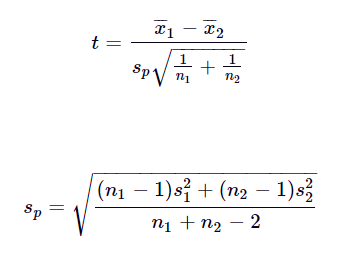

* x¯1 = Mean of first sample
* x¯2 = Mean of second sample
* n1 = Sample size (i.e., number of observations) of first sample
* n2 = Sample size (i.e., number of observations) of second sample
* s1 = Standard deviation of first sample
* s2 = Standard deviation of second sample
* sp = Pooled standard deviation

The calculated t value is then compared to the critical t value from the t distribution table with degrees of freedom df = n1 + n2 - 2 and chosen confidence level. If the calculated t value is greater than the critical t value, then we reject the null hypothesis.

EQUAL VARIANCES NOT ASSUMED
When the two independent samples are assumed to be drawn from populations with unequal variances (i.e., σ12 ≠ σ22), the test statistic t is computed as:





In [28]:
np.random.seed(12)
classB_ages = stats.poisson.rvs(loc=18,mu=33,size=60)
classB_ages.mean()


50.63333333333333

In [27]:
ttest,p_value = stats.ttest_ind(a=classA_ages,b=classB_ages,equal_var=False)   
# equal_var=False means perform Welch's t-test, which does not assume equal population variance [2]

In [26]:
p_value

0.00039942095100859375

In [25]:
if p_value<0.05:
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

We are rejecting null hypothesis


## 3. Paired T-test with Python

When you want to check how different samples from the same group are, you can go for a paired T-test.

In [29]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [30]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


In [33]:
## lets generate a dataframe of weight using weight1 and weight2
# by using dict

data = {"weight_10":np.array(weight1),
        "weight_20":np.array(weight2),
        "weight_change":np.array(weight2)-np.array(weight1)}
weight_df=pd.DataFrame(data)

In [34]:
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [35]:
ttest,p_value = stats.ttest_rel(a=weight1,b=weight2)

In [36]:
print(p_value)

0.5732936534411279


In [37]:
if p_value<0.05:
    print("we are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

We are accepting null hypothesis


## Correlation 

In [38]:
import seaborn as sns
df=sns.load_dataset('iris')

In [39]:
df.shape

(150, 5)

In [40]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


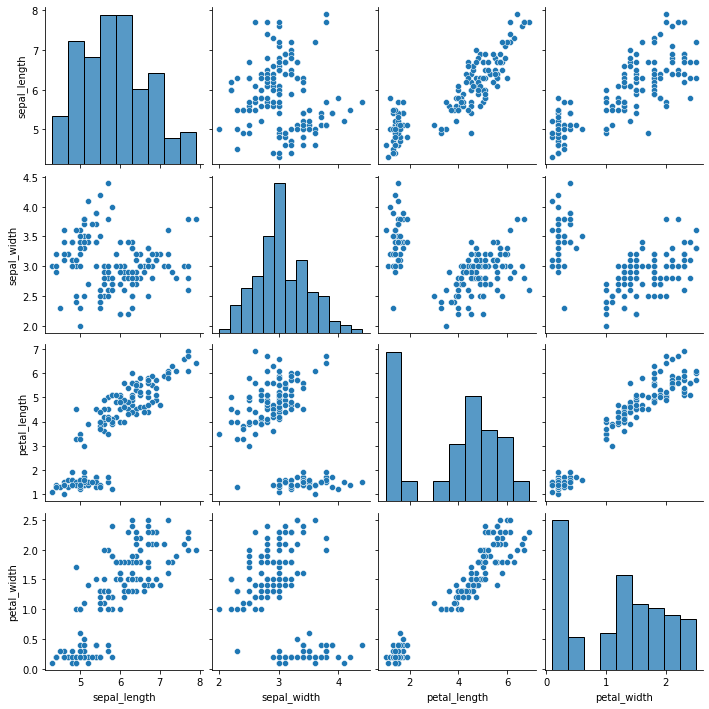

In [41]:
sns.pairplot(df)